# TACO Inspection Demo

This notebook contains several independent scripts that show how to load and visualize the dataset stats and annotated images:
- Section 1 shows the dataset stats
- Section 2 show the class hierarchical structure: super classes and classes
- Section 3 shows TACO images along with their segmentation masks

But first we need to load the annotations and some python libraries:

In [ ]:
# 00.00 clone repo

# Notes:
# 1. This section follows the TACO repo README instructions
# 2. Setup is required to download images/annotations

# clone repo for use
!git clone https://github.com/code4sac/TACO taco_demo
%cd taco_demo
!ls -al

# download required modules
!pip3 install -r requirements.txt
!pip3 install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI
# !python3 download.py


Cloning into 'taco_demo'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 476 (delta 150), reused 124 (delta 71), pack-reused 270
Receiving objects: 100% (476/476), 68.35 MiB | 15.89 MiB/s, done.
Resolving deltas: 100% (301/301), done.
/content/taco_demo/taco_demo/taco_demo/taco_demo/taco_demo/taco_demo/taco_demo/taco_demo/taco_demo
total 18452
drwxr-xr-x 5 root root     4096 Dec 18 23:21 .
drwxr-xr-x 6 root root     4096 Dec 18 23:21 ..
drwxr-xr-x 2 root root     4096 Dec 18 23:21 data
-rw-r--r-- 1 root root 18845855 Dec 18 23:21 demo.ipynb
drwxr-xr-x 3 root root     4096 Dec 18 23:21 detector
-rw-r--r-- 1 root root     1751 Dec 18 23:21 download.py
drwxr-xr-x 8 root root     4096 Dec 18 23:21 .git
-rw-r--r-- 1 root root       13 Dec 18 23:21 .gitignore
-rw-r--r-- 1 root root     1074 Dec 18 23:21 LICENSE
-rw-r--r-- 1 root root     4475 Dec 18 23:21 README.md
-rw-r--r-- 1 root ro

## Accessing TACO From Beneath code4sac.public Share

Many of us rely upon shared folder *code4sac.public* for access to a working copy of the TACO distribution.  However, mounting your Google Drive as "MyDrive" using ```drive.mount()``` will *not* show the folders that are shared with you.

To access the *code4sac.public* shared folder, you must use the Google Drive UI, and create a shortcut to the shared folder from your Google Drive.

See the answers within the following StackOverflow thread for further instruction and information: [accessing "Shared with me" with Colab](https://stackoverflow.com/questions/54351852/accessing-shared-with-me-with-colab)

In [ ]:
# 00.01 google drive

from os import path
from google.colab import drive

def mountTacoFromCode4SacShare():
    drive.mount('/content/drive', force_remount=True)
    if not (path.exists('/content/drive/MyDrive/code4sac.public')):
        print('Shared folder \'code4sac.public\' is not accessible! Have you created the shortcut beneath \'My Drive\'?')
    else:
        tacodir = '/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO'
        if not (path.exists(tacodir)):
            print('Working TACO directory must exist before proceding')
        else:
            print('Working TACO directory: ', tacodir)


In [ ]:
mountTacoFromCode4SacShare()

Mounted at /content/drive
Working TACO directory:  /content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO


In [ ]:
# 00.02 open file

%matplotlib inline
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

tacodir = '/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO'
dataset_path = tacodir + '/data'
# anns_file_path = dataset_path + '/' + 'annotations.json'
anns_file_path = dataset_path + '/' + 'annotations_unofficial.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)


Number of super categories: 28
Number of categories: 60
Number of annotations: 7268
Number of images: 3185


## 1.  Dataset statistics

This shows the number of annotations per category:

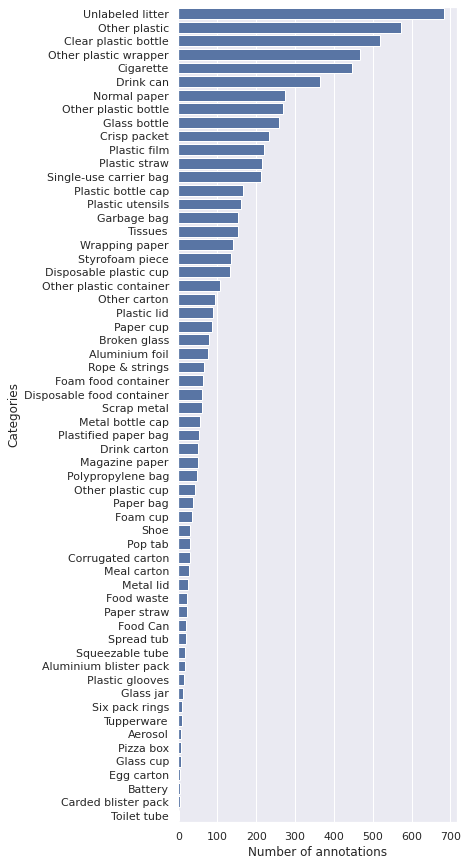

In [ ]:
# 01.00 dataset stats

# Count annotations
cat_histogram = np.zeros(nr_cats,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")

# fig = plot_1.get_figure()
# fig.savefig("output.png")


and this shows the number of annotations per super category:

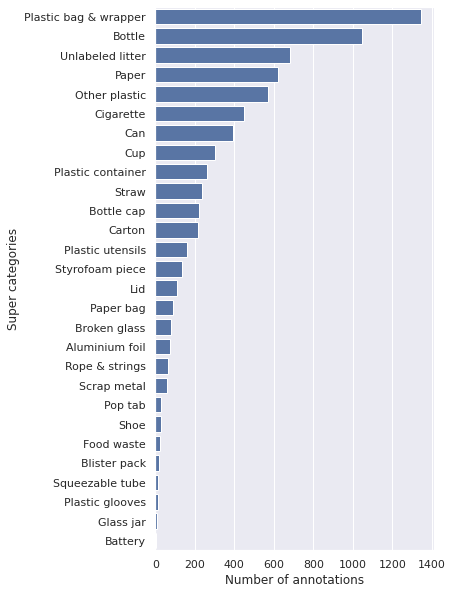

In [ ]:
# 01.01 annotate super cat

cat_ids_2_supercat_ids = {}
for cat in categories:
    cat_ids_2_supercat_ids[cat['id']] = super_cat_ids[cat['supercategory']]

# Count annotations
super_cat_histogram = np.zeros(nr_super_cats,dtype=int)
for ann in anns:
    cat_id = ann['category_id']
    super_cat_histogram[cat_ids_2_supercat_ids[cat_id]] +=1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,10))

# Convert to DataFrame
d ={'Super categories': super_cat_names, 'Number of annotations': super_cat_histogram}
df = pd.DataFrame(d)
df = df.sort_values('Number of annotations', 0, False)

# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Super categories", data=df,
            label="Total", color="b")
#plot_1.set_title('Annotations per super category',fontsize=20)


### 1.1  Background stats

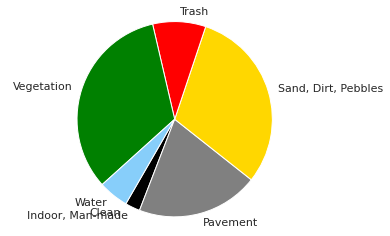

In [ ]:
# 01.02 background stats

# Get scene cat names
scene_cats = dataset['scene_categories']
scene_name = []
for scene_cat in scene_cats:
    scene_name.append(scene_cat['name'])

nr_scenes = len(scene_cats)
scene_cat_histogram = np.zeros(nr_scenes,dtype=int)

for scene_ann in dataset['scene_annotations']:
    scene_ann_ids = scene_ann['background_ids']
    for scene_ann_id in scene_ann_ids:
        if scene_ann_id<len(scene_cats):
            scene_cat_histogram[scene_ann_id]+=1

# Convert to DataFrame
df = pd.DataFrame({'scene_cats': scene_cats, 'nr_annotations': scene_cat_histogram})

# Plot
colors = ['white','black','gray', 'gold', 'red','green','lightskyblue']
plt.pie(scene_cat_histogram, labels=scene_name, colors = colors,
      shadow=False, startangle=-120)

plt.axis('equal')
plt.show()


## 2. Visualize dataset graph

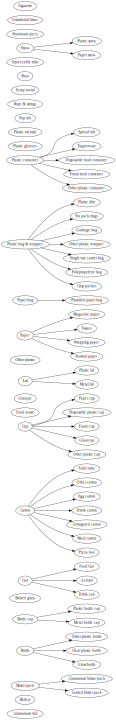

In [ ]:
# 02.00 dataset graph

from graphviz import Digraph
# Note: graphviz may require more than pip installation due to path issue: e.g. brew install graphviz for mac

#g = Digraph('G', filename='hello.gv')
dot = Digraph('Dataset graph', filename='asd.gv')
dot.attr(rankdir='LR', size='8,10')

for cat_it in categories:
    dot.node(cat_it['name'])
    if cat_it['name']==cat_it['supercategory']:
        dot.node(cat_it['supercategory'])
    else:
        dot.edge(cat_it['supercategory'], cat_it['name'])
dot
# Uncomment next line to print pdf
#dot.view()


## 3. Visualize Annotated Images

For simplicity, to select and show the dataset images with the respective masks, we make use of the COCO API.
The script below shows how to load and visualize an image with all its annotations.

Unfortunately, several python libraries do not take into account the EXIF orientation tag, thus we have to explicitly rotate the images. Alternatively you can use instead OpenCV.

In [ ]:
mountTacoFromCode4SacShare()

Mounted at /content/drive
Working TACO directory:  /content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO


In [ ]:
# 03.00 filter category

from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# image_filepath = 'unofficial/000001.jpg'

pylab.rcParams['figure.figsize'] = (28,28)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Find image id
img_id = -1
for img in imgs:
    # debug/output filepath
    print(img['file_name'])
    print(image_filepath)
    if img['file_name'] == image_filepath:
        img_id = img['id']
        break

# Show image and corresponding annotations
if img_id == -1:
    print('Incorrect file name')
    # debug/output filepath
    # print(img_id)
else:
    # Load image
    import os
    if os.path.exists(image_filepath):
        I = Image.open(dataset_path + '/' + image_filepath)
        # print(image_filepath)
        # try:
        #     I = Image.open(dataset_path + '/' + image_filepath)
        # except IOError:
        #     print('%s could not be opened' % image_filepath)

        # Load and process image metadata
        if I._getexif():
            exif = dict(I._getexif().items())
            # Rotate portrait and upside down images if necessary
            if orientation in exif:
                if exif[orientation] == 3:
                    I = I.rotate(180,expand=True)
                if exif[orientation] == 6:
                    I = I.rotate(270,expand=True)
                if exif[orientation] == 8:
                    I = I.rotate(90,expand=True)

        # Show image
        fig,ax = plt.subplots(1)
        plt.axis('off')
        plt.imshow(I)

        # Load mask ids
        annIds = coco.getAnnIds(imgIds=img_id, catIds=[], iscrowd=None)
        anns_sel = coco.loadAnns(annIds)

        # Show annotations
        for ann in anns_sel:
            color = colorsys.hsv_to_rgb(np.random.random(),1,1)
            for seg in ann['segmentation']:
                poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
                p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
                ax.add_collection(p)
                p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
                ax.add_collection(p)
            [x, y, w, h] = ann['bbox']
            rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                             facecolor='none', alpha=0.7, linestyle = '--')
            ax.add_patch(rect)

        plt.show()


loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
unofficial/000000.jpg
unofficial/000001.jpg
unofficial/000001.jpg
unofficial/000001.jpg


The script below shows how to filter images by either category or supercategory.

Go ahead and try different (super)categories searches by changing the `category_name`.
Note that small objects may be hard to see.

In [ ]:
# 03.01 filter supercat

from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
nr_img_2_display = 10
category_name = 'Bottle'#  --- Insert the name of one of the categories or super-categories above
pylab.rcParams['figure.figsize'] = (14,14)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Get image ids
imgIds = []
catIds = coco.getCatIds(catNms=[category_name])
if catIds:
    # Get all images containing an instance of the chosen category
    imgIds = coco.getImgIds(catIds=catIds)
else:
    # Get all images containing an instance of the chosen super category
    catIds = coco.getCatIds(supNms=[category_name])
    for catId in catIds:
        imgIds += (coco.getImgIds(catIds=catId))
    imgIds = list(set(imgIds))

nr_images_found = len(imgIds)
print('Number of images found: ',nr_images_found)

# Select N random images
random.shuffle(imgIds)
imgs = coco.loadImgs(imgIds[0:min(nr_img_2_display,nr_images_found)])

for img in imgs:
    image_path = dataset_path + '/' + img['file_name']
    # debug/output filepath
    print(image_path)

    # Load image
    import os
    if os.path.exists(image_path):
        I = Image.open(image_path)
        # debug/output filepath
        # print(image_path)

        # Show image
        fig,ax = plt.subplots(1)
        plt.axis('off')
        plt.imshow(I)
        plt.show()

        # Load and process image metadata
        if I._getexif():
            exif = dict(I._getexif().items())
            # Rotate portrait and upside down images if necessary
            if orientation in exif:
                if exif[orientation] == 3:
                    I = I.rotate(180,expand=True)
                if exif[orientation] == 6:
                    I = I.rotate(270,expand=True)
                if exif[orientation] == 8:
                    I = I.rotate(90,expand=True)

            # Show image
            fig,ax = plt.subplots(1)
            plt.axis('off')
            plt.imshow(I)

            # Load mask ids
            annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
            anns_sel = coco.loadAnns(annIds)

            # Show annotations
            for ann in anns_sel:
                color = colorsys.hsv_to_rgb(np.random.random(),1,1)
                for seg in ann['segmentation']:
                    poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
                    p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
                    ax.add_collection(p)
                    p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
                    ax.add_collection(p)
                [x, y, w, h] = ann['bbox']
                rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                                 facecolor='none', alpha=0.7, linestyle = '--')
                ax.add_patch(rect)

            plt.show()


loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
Number of images found:  716
/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO/data/unofficial/003123.jpg
/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO/data/unofficial/001170.jpg
/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO/data/unofficial/000301.jpg
/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO/data/unofficial/002488.jpg
/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO/data/unofficial/001461.jpg
/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO/data/unofficial/002187.jpg
/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO/data/unofficial/001133.jpg
/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO/data/unofficial/001293.jpg
/content/drive/MyDrive/code4sac.public/Projects/TrashAI/working/TACO/data/unofficial/001451.jpg
/content/drive/MyDrive/c